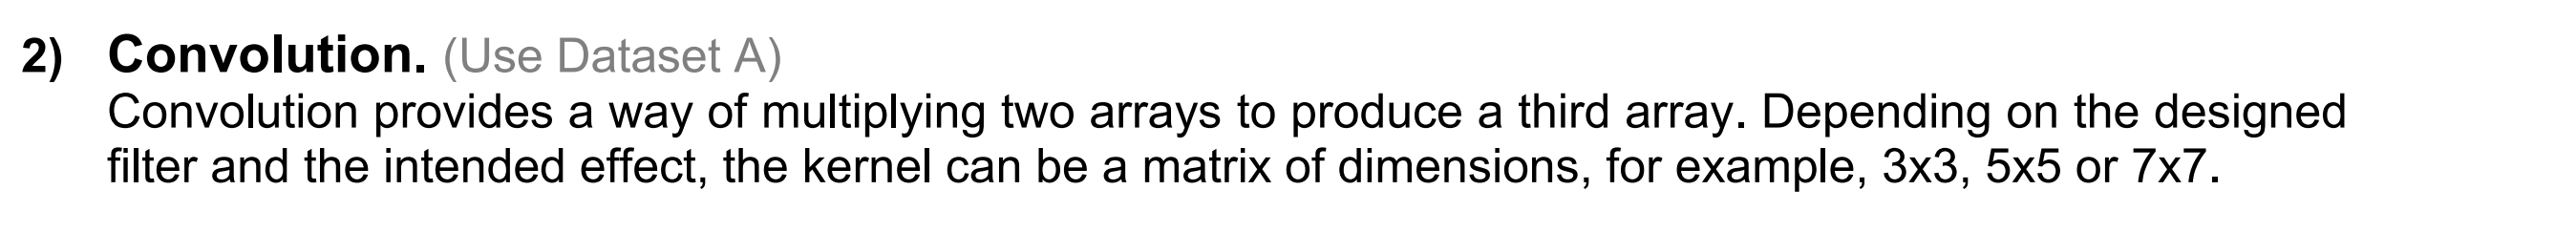

In [14]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [15]:
path = "Dataset//DatasetA//face-1.jpg"
image = np.array(Image.open(path))

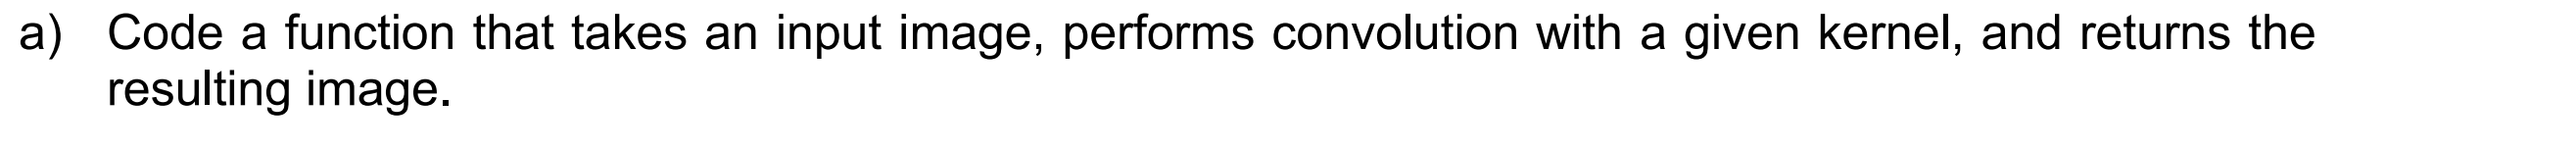

In [16]:
def convolution (image, kernel):
    step = math.floor(kernel.shape[0]/2)
    reshape_factor = step * 2
    kernel_height, kernel_width = kernel.shape[0],kernel.shape[1]
    
    new_image = np.zeros((image.shape[0] + reshape_factor, image.shape[1] + reshape_factor, image.shape[2]))
    new_image[step:new_image.shape[0]-step, step:new_image.shape[1]-step,:] = image
    output = np.zeros((image.shape))
    
    for k in range(output.shape[2]):
        for i in range(output.shape[0]):
            i_start, i_stop = i, i+kernel_height
            for j in range(output.shape[1]):
                j_start, j_stop = j, j+kernel_width

                if i_start >= 0 and j_start>=0 and i_stop < new_image.shape[0] and j_stop < new_image.shape[1]:
                    multipication = np.multiply(new_image[i_start:i_stop, j_start:j_stop, k], kernel) 
                    output[i, j, k] = np.sum(multipication)/(kernel.shape[0]**2)
#                 else:
#                   output[i, j, k] = new_image[i,j,k]
#                     print(i_stop, j_stop)
    
    print("Convolution finished!")
    return output

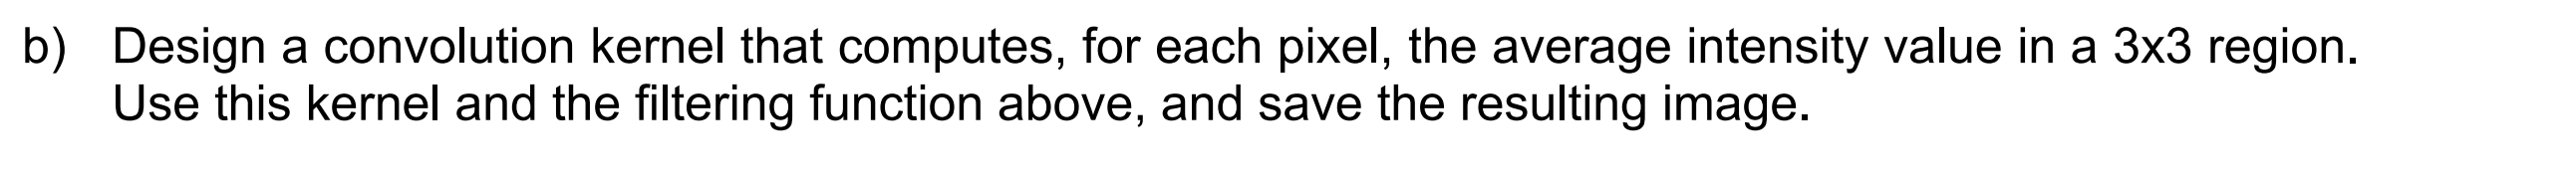

In [17]:
avg_kernels = [np.ones((3, 3)), np.ones((5, 5)), np.ones((7, 7)), np.ones((13, 13))]

Convolution finished!


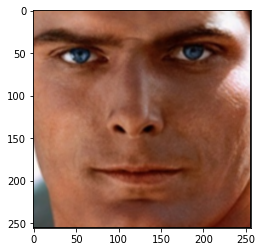

In [18]:
out = Image.fromarray((convolution(image, avg_kernels[0])).astype(np.uint8))
plt.imshow(out)
out.save("convs/"+"Q2-b/"+"avg_intensity.png")

# Example

Convolution finished!
Convolution finished!
Convolution finished!
Convolution finished!


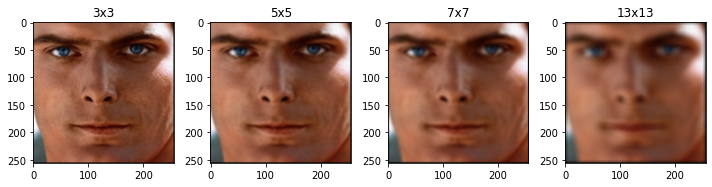

In [19]:
outputs = []
titles = ["3x3", "5x5", "7x7", "13x13"]

for kernel in avg_kernels:
    outputs.append(Image.fromarray((convolution(image, kernel)).astype(np.uint8)))
    
fig, axes = plt.subplots(1, 4, figsize=(10, 10))



for j in range(4):


    axes[j].imshow(outputs[j])
    axes[j].set_title(titles[j])

# Adjust the layout
plt.tight_layout()
# Show the figure
plt.show()

# plt.imshow(Image.fromarray((output).astype(np.uint8)))

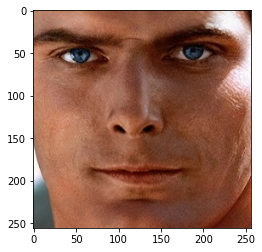

In [20]:
plt.imshow(image)

In [21]:
for i in range(len(outputs)):
    outputs[i].save("convs/"+"Examples/"+ "faces-1" + titles[i] + ".png")

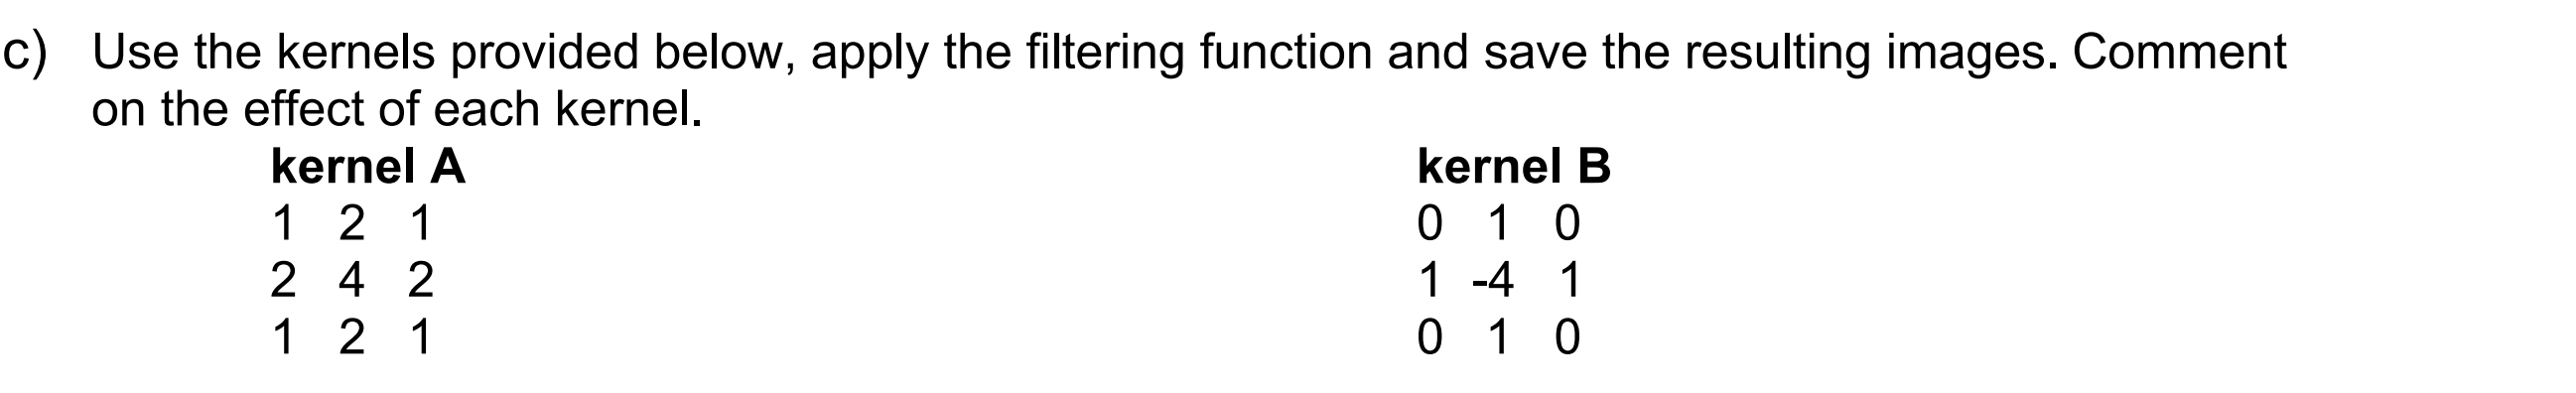

In [22]:
kernel_A = np.array([[1,2,1],[2,4,2],[1,2,1]])
kernel_B = np.array([[0,1,0],[1,-4,1],[0,1,0]])

Convolution finished!


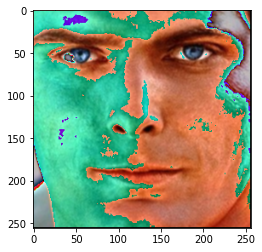

In [23]:
output_A = Image.fromarray((convolution(image, kernel_A)).astype(np.uint8))
plt.imshow(output_A)
output_A.save("convs/"+ "Q2-c/" + "kernel_A" + ".png")

Convolution finished!


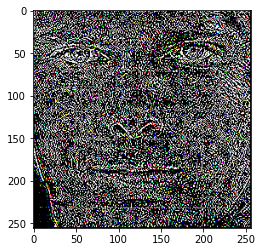

In [24]:
output_B = Image.fromarray((convolution(image, kernel_B)).astype(np.uint8))
plt.imshow(output_B)
output_A.save("convs/"+ "Q2-c/" + "kernel_B" + ".png")

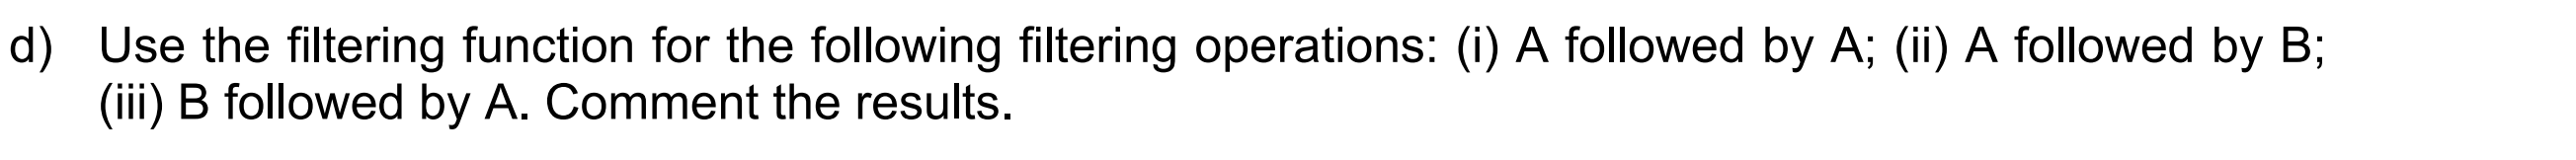

Convolution finished!
Convolution finished!


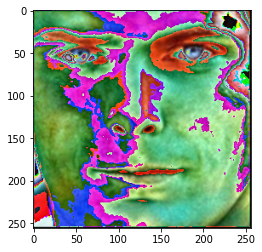

In [25]:
output_AA = Image.fromarray((convolution(convolution(image, kernel_A), kernel_A)).astype(np.uint8))

plt.imshow(output_AA)

Convolution finished!
Convolution finished!


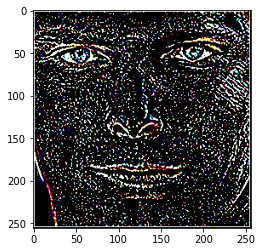

In [26]:
output_AB = Image.fromarray((convolution(convolution(image, kernel_A), kernel_B)).astype(np.uint8))

plt.imshow(output_AB)

Convolution finished!
Convolution finished!


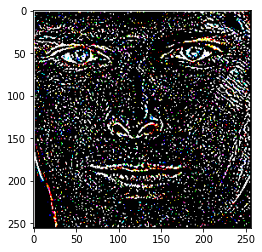

In [27]:
output_BA = Image.fromarray((convolution(convolution(image, kernel_B), kernel_A)).astype(np.uint8))

plt.imshow(output_BA)